## Exercici 1
**Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" (fes una còpia i executa els comandaments amb el mateix dataset county.txt). Aquest exercici consisteix a observar les diferents possibilitats que ofereixen les diferents llibreries de visualització gràfica.**

In [6]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [7]:
# Open the choosen file
county = pd.read_csv('https://raw.githubusercontent.com/BIDDL3/Examining-Data/main/county.txt', sep='\t', encoding='utf-8')
county.head()

,name,state,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
0,Autauga County,Alabama,43671.0,54571,6.068095,10.6,77.5,7.2,24568,53255
1,Baldwin County,Alabama,140415.0,182265,6.139862,12.2,76.7,22.6,26469,50147
2,Barbour County,Alabama,29038.0,27457,8.752158,25.0,68.0,11.1,15875,33219
3,Bibb County,Alabama,20826.0,22915,7.122016,12.6,82.9,6.6,19918,41770
4,Blount County,Alabama,51024.0,57322,5.130910,13.4,82.0,3.7,21070,45549


In [8]:
county.shape

(3143, 10)

In [9]:
county.columns

Index(['name', 'state', 'pop2000', 'pop2010', 'fed_spend', 'poverty',
       'homeownership', 'multiunit', 'income', 'med_income'],
      dtype='object')

In [10]:
county.state.nunique()

51

In [11]:
county.describe().round(3)

,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
count,3140.000,3143.000,3139.000,3143.000,3143.000,3143.000,3143.000,3143.000
mean,89623.445,98232.752,9.991,15.499,73.264,12.325,22504.696,44270.299
std,292504.848,312901.202,7.567,6.384,7.832,9.291,5408.668,11547.636
min,67.000,82.000,0.000,0.000,0.000,0.000,7772.000,19351.000
25%,11209.750,11104.500,6.964,11.000,69.500,6.100,19030.000,36952.000
50%,24608.000,25857.000,8.669,14.700,74.600,9.700,21773.000,42445.000
75%,61766.500,66699.000,10.857,19.000,78.400,15.900,24813.500,49142.000
max,9519338.000,9818605.000,204.616,53.500,91.300,98.500,64381.000,115574.000


In [12]:
county.pop2000.mean()

89623.44490445859

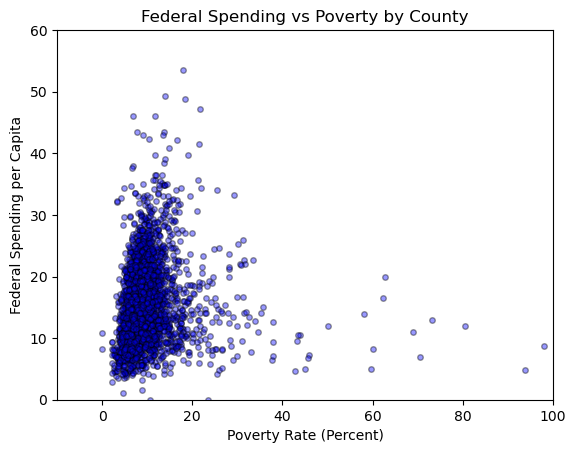

In [13]:
# Create data
x = county.fed_spend
y = county.poverty
colors = 'Blue'
area = np.pi*5

plt.axis([-10, 100, 0, 60])

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')

plt.title('Federal Spending vs Poverty by County')
plt.ylabel('Federal Spending per Capita')
plt.xlabel('Poverty Rate (Percent)')
plt.show()

## Exercici 2
**Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.**

In [47]:
import pandas as pd
pelis = pd.read_csv('pelis.csv', header= 0, encoding= 'unicode_escape')
pelis.head()

,Unnamed: 0,title,genre,1,2,3,4,5
0,1,Toy Story (1995),"Animation, Children's, Comedy",Animation,Children's,Comedy,NaN,NaN
1,2,Jumanji (1995),"Adventure, Children's, Fantasy",Adventure,Children's,Fantasy,NaN,NaN
2,3,Grumpier Old Men (1995),"Comedy, Romance",Comedy,Romance,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),"Comedy, Drama",Comedy,Drama,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,Comedy,NaN,NaN,NaN,NaN


In [48]:
warnings.filterwarnings('ignore')

In [49]:
pelis['year'] = pelis.title.str.extract('(\(\d\d\d\d\))',expand=False)
pelis.head()

,Unnamed: 0,title,genre,1,2,3,4,5,year
0,1,Toy Story (1995),"Animation, Children's, Comedy",Animation,Children's,Comedy,NaN,NaN,(1995)
1,2,Jumanji (1995),"Adventure, Children's, Fantasy",Adventure,Children's,Fantasy,NaN,NaN,(1995)
2,3,Grumpier Old Men (1995),"Comedy, Romance",Comedy,Romance,NaN,NaN,NaN,(1995)
3,4,Waiting to Exhale (1995),"Comedy, Drama",Comedy,Drama,NaN,NaN,NaN,(1995)
4,5,Father of the Bride Part II (1995),Comedy,Comedy,NaN,NaN,NaN,NaN,(1995)


In [50]:
pelis['title'] = pelis.title.str.replace('(\(\d\d\d\d\))', '')
pelis.head()

,Unnamed: 0,title,genre,1,2,3,4,5,year
0,1,Toy Story,"Animation, Children's, Comedy",Animation,Children's,Comedy,NaN,NaN,(1995)
1,2,Jumanji,"Adventure, Children's, Fantasy",Adventure,Children's,Fantasy,NaN,NaN,(1995)
2,3,Grumpier Old Men,"Comedy, Romance",Comedy,Romance,NaN,NaN,NaN,(1995)
3,4,Waiting to Exhale,"Comedy, Drama",Comedy,Drama,NaN,NaN,NaN,(1995)
4,5,Father of the Bride Part II,Comedy,Comedy,NaN,NaN,NaN,NaN,(1995)


In [82]:
df = pelis.drop(['Unnamed: 0', 'genre', '2', '3', '4', '5',], axis=1)
df

,title,1,year
0,Toy Story,Animation,(1995)
1,Jumanji,Adventure,(1995)
2,Grumpier Old Men,Comedy,(1995)
3,Waiting to Exhale,Comedy,(1995)
4,Father of the Bride Part II,Comedy,(1995)
...,...,...,...
3878,Meet the Parents,Comedy,(2000)
3879,Requiem for a Dream,Drama,(2000)
3880,Tigerland,Drama,(2000)
3881,Two Family House,Drama,(2000)


In [83]:
df['year'] = df.year.str.extract('(\d\d\d\d)',expand=False)
df.head()

,title,1,year
0,Toy Story,Animation,1995
1,Jumanji,Adventure,1995
2,Grumpier Old Men,Comedy,1995
3,Waiting to Exhale,Comedy,1995
4,Father of the Bride Part II,Comedy,1995


*aquest és el dataframe definitiu, 'haguès agradat fer-ho d'una altre forma, durant auqest dies m'engrescat bastant per aconseguir aquesta taula amb un get_dummies amb totes les 5 columnes de genre, però no va sortir, només vaig aconseguir un dataframe amb moltes columnes repes, tot i que vaig utilitzar un concat (que pensava que servia per staquear tots els valors i reduïr les columnes repes*

In [53]:
freq1 = df['1'].value_counts() 
freq1

Drama          1176
Comedy         1024
Action          502
Horror          261
Adventure       155
Crime           131
Documentary     121
Thriller        101
Animation        89
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: 1, dtype: int64

In [54]:
freq = df['year'].value_counts() 
freq

1996    344
1995    340
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: year, Length: 81, dtype: int64

In [55]:
freq = df.groupby(['1', 'year']).size() 
print(freq)

1        year
Action   1919    1
         1921    1
         1933    2
         1938    1
         1942    1
                ..
Western  1985    1
         1992    1
         1993    1
         1994    2
         1995    2
Length: 623, dtype: int64


In [33]:
df.dtypes

title    object
1        object
year     object
dtype: object

In [64]:
df['year'] = pd.to_datetime(df['year'])
df.dtypes

title            object
1                object
year     datetime64[ns]
dtype: object

## Exercici 3

**Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?**

**Fes una o dues representacions gràfiques i justifica la teva elecció.**

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

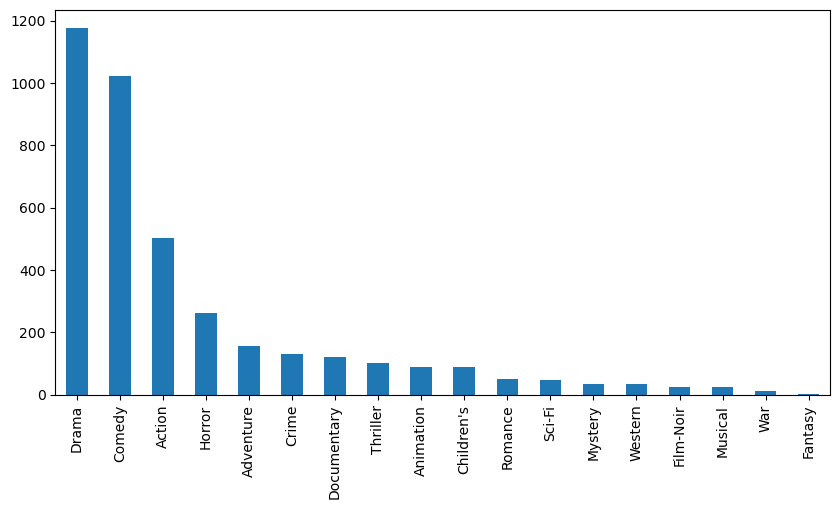

In [77]:
# aquesta és per provar un plot versus sns, cuantitat de pelis 
df["1"].value_counts().plot(kind = 'bar', figsize=(10,5))

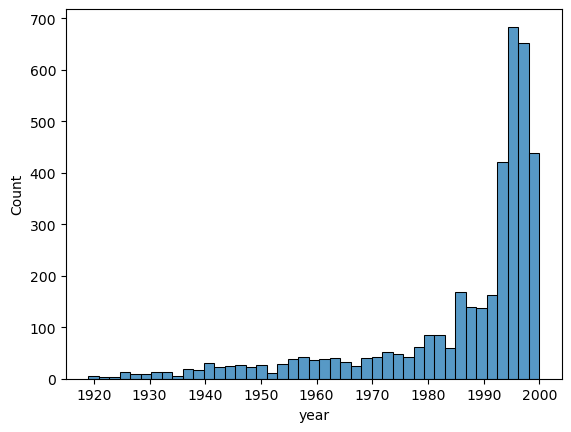

In [68]:
# sns de la cuantitat de pelis per any
sns.histplot(df.year)
plt.show()

Text(0.5, 1.0, 'Els géneres més utilitzats')

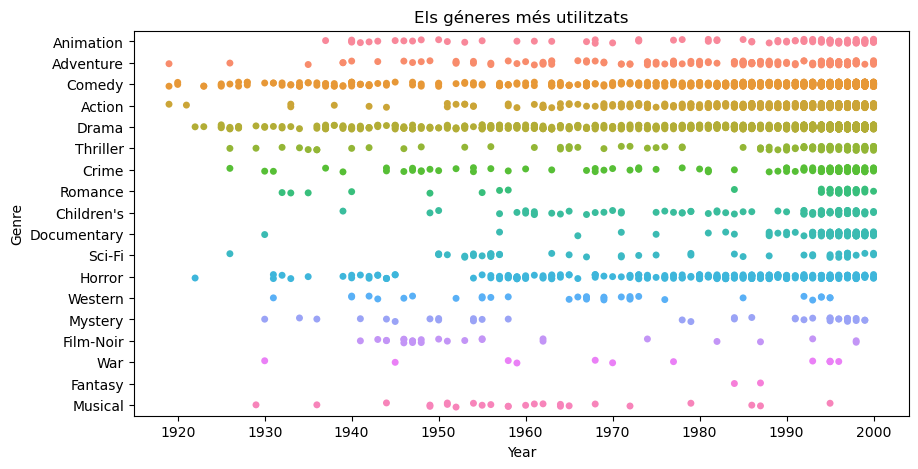

In [79]:
fig = plt.figure(dpi=100, figsize=(10,5))
ax = fig.gca()
sns.stripplot(data=df, x="year", y="1", orient="h")
ax.set_ylabel("Genre")
ax.set_xlabel("Year")
ax.set_title("Els géneres més utilitzats")

*es poden veure els géneres més utilitzats per any*